In [242]:
from pykat import finesse 
       
from pykat.commands import *     
import numpy as np               
import matplotlib.pyplot as plt  
import scipy                     
from IPython import display
              

pykat.init_pykat_plotting(dpi=200)

kat=finesse.kat()
kat1=finesse.kat()
kat.verbose=True

In [243]:
kat.parse("""

maxtem 3
l laser 30 0 n1                          #laser 1W
s gap01 1 n1 n2                         #space b/w mod and laser  
mod sb1 55.5556M 0.001 3 pm n2 n3         #modulator PM 55.5556M 3f
s gap02 0.5 n3 n31                     #space b/w mod and PRM      


##### FOR ANGULAR SENSING PRM #####
bs pickoff 0.0001 0.9999 0 45 n31 dump n32 refl_a
s s2 0.1 refl_a a8                       
bs bsQPD 0.5 0.5 0 45 a8 a9 a10 dump            #bs to split power between two detectors 

s sQPD1 0.1 a9 a11                   
s sQPD2 0.1 a10 a12

attr s2 g 45                                 #guoy phase for det1
attr sQPD1 g 40                                 #guoy phase for det1
attr sQPD2 g 130                                #guoy phase for det2

pd1 QPDrefl1 166.6668M 90 a11                       #Split detector1 refl
pdtype QPDrefl1 x-split   
pd1 QPDrefl2 166.6668M 90 a12                       #Split detector2 refl
pdtype QPDrefl2 x-split  

#######################


##### FOR ANGULAR SENSING ITM/ETM #####
s sr 0.01 n12 n12a    
bs pickoff1 0.0001 0.9999 0 45 n12a dump n121 refl_itm
s s21 0.1 refl_itm a81                       
bs bsQPD1 0.5 0.5 0 45 a81 a91 a101 dump            #bs to split power between two detectors 

s sQPD11 0.1 a91 a11a                   
s sQPD21 0.1 a101 a12a

attr s21 g 45                                 #guoy phase for det1
attr sQPD11 g 0                                 #guoy phase for det1
attr sQPD21 g 90                                #guoy phase for det2

pd1 QPDrefl1_itm 55.5556M 90 a11a                       #Split detector1 refl
pdtype QPDrefl1_itm x-split   
pd1 QPDrefl2_itm 55.5556M 90 a12a                       #Split detector2 refl
pdtype QPDrefl2_itm x-split  

#########################



####### 3 m setup ###########

s gap03 0.5 n32 refl

m PRM 0.759 0.1 90 refl pop               #PRM                ---> POP <---
#m PRM 0 1 90 refl pop               #PRM
s PRC 1.350 pop b3                        #PRC 
m ITM 0.98997 0.01 0 b3 n12              #ITM
s ARM 3.29 n121 b5                        #ARM length 3.3 (0.1 from sr length) 
m ETM 0.99996 0.00001 90 b5 b6           #ETM
#m ETM 0 1 0 b5 b6 

################################

cav PRCL PRM pop ITM b3
cav ARML ITM n12 ETM b5 
trace 2 


##### attr for TM ######

attr ETM Rc 11.3            # RoC of ETM
attr PRM Rc -23.6           # RoC of PRM

attr PRM xbeta 0            # misalgnment 
attr ETM xbeta 0         
attr ITM xbeta 0 
######################


#### LOCK PRM ####
set errs pop_Q_raw re
lock clocks $errs 3000 1m
put* ETM phi $clocks
noplot clocks
#####


##### PD #######

pd circ_arm b5
pd circ_prc pop
pd refl refl
pd trans b6
 

pd1 refl_I 55.5556M 23 refl              # REFL I  1f
pd1 refl_Q 55.5556M 113 refl             # REFL Q  1f
pd1 refl_I_f3 166.6668M 0 refl          # REFL I  3f
pd1 refl_Q_f3 166.6668M 90 refl         # REFL Q  3f
pd1 pop_I_raw 55.5556M 0 pop                # POP I  1f
pd1 pop_Q_raw 55.5556M 90 pop               # POP Q  1f
pd1 pop_I_f3_raw 166.6668M 0 pop            # POP I  3f
pd1 pop_Q_f3_raw 166.6668M 90 pop           # POP Q  3f

################





xaxis ETM xbeta lin 0 0.5m 900


#xaxis PRM xbeta lin 0 0.3m 200
#xaxis ETM phi lin 85 95 900
#func prm_tune = 90 + $x1*0.1
#put PRM phi $prm_tune
yaxis lin abs

 

""")

Parsing `set errs pop_Q_raw re` into pykat object not implemented yet, added as extra line.


In [244]:
out = kat.run()
out.info()
#out.plot()

--------------------------------------------------------------
Running kat - Started at 2022-10-15 13:16:57.031828


 99% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

Used Finesse None at C:\Users\Parivesh\anaconda3\Library\bin\kat.exe

Finished in 5.78144 seconds

--- Output info ---

Run date and time: 2022-10-15 13:16:57.031828
Detectors used: QPDrefl1, QPDrefl1_itm, QPDrefl2, QPDrefl2_itm, circ_arm, circ_prc, clocks, pop_I_f3_raw, pop_I_raw, pop_Q_f3_raw, pop_Q_raw, refl, refl_I, refl_I_f3, refl_Q, refl_Q_f3, trans

One xaxis used: ['xaxis ETM xbeta lin 0 0.0005 900']
QPDrefl1     : min = -2.038893917876610e-17 max = 2.703952976448340e-15
QPDrefl2     : min = -3.891569299908470e-15 max = 6.984616889760350e-15
QPDrefl1_itm : min = -4.241075786924380e-08 max = 1.452479000799640e-08
QPDrefl2_itm : min = -2.822254033032710e-08 max = 4.298410187424440e-08
circ_arm     : min = 7.088453750567670e-09 max = 3.717051811411240e+04
circ_prc     : min = 8.569346253207450e-01 max = 9.851360447579241e+01
refl         : min = 3.252758611202430e+00 max = 2.564656193948130e+01
trans        : min = 8.607637612680770e-08 max = 3.717200499431220e-01
refl_I       : m

100% | ETA:  0:00:00 | Calculating - Locked ✓ (Locking steps tried 0/10000)    

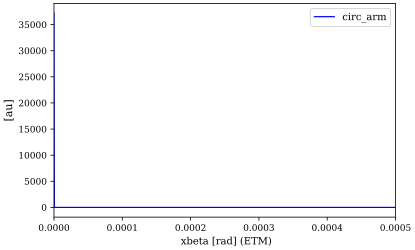

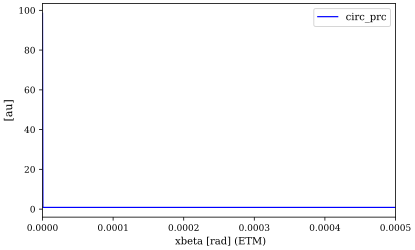

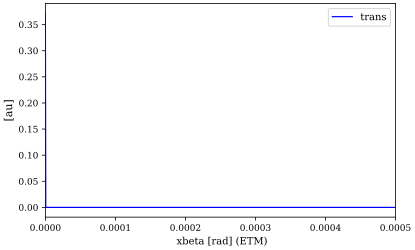

In [245]:
out.plot(['circ_arm'])
out.plot(['circ_prc'])
out.plot(['trans'])

In [246]:
#out.plot(['clocks'])

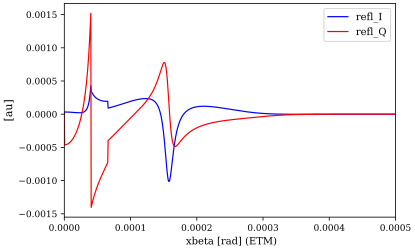

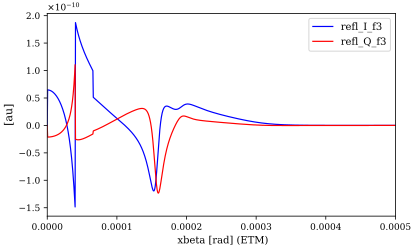

In [247]:
out.plot(['refl_Q','refl_I'])
out.plot(['refl_I_f3','refl_Q_f3'])

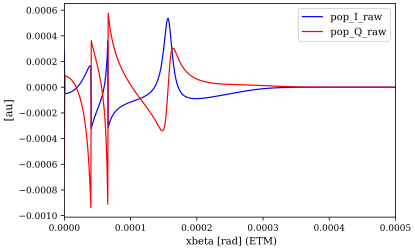

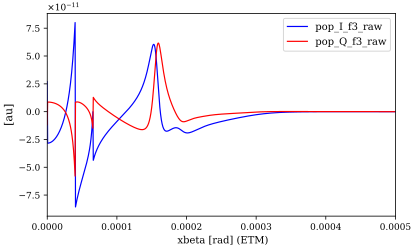

In [248]:
out.plot(['pop_I_raw','pop_Q_raw'])
out.plot(['pop_I_f3_raw','pop_Q_f3_raw'])

In [249]:
#out.stdout

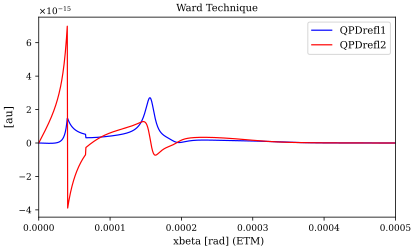

In [250]:
out.plot(['QPDrefl1','QPDrefl2'],title='Ward Technique')
#out.plot(['QPDrefl1_itm','QPDrefl2_itm'],title='Ward Technique')

In [251]:
#i=0
#for i in np.arange(0, 90, 4):
#    kat.refl_I_f3.phase1 = i
#    #kat4.sQPD1.gouy = i
#    out3 = kat.run()
#    out3.info()
#    out3.plot(['QPDrefl1','QPDrefl2'],title='Ward Technique/Soft mode')
#    print(i)

In [252]:
#i=0
#for i in range(90):
#    kat.sQPD2.gouy = i+90
#    kat.sQPD1.gouy = i
#    i = i+3
#    out3 = kat.run()
#    out3.info()
#    out3.plot(['QPDrefl1','QPDrefl2'],title='Ward Technique')